#TASK 1
Run ‘ffmpeg’ and upload a screenshot of the first line

For this first task, we will download ffmpeg.

In [ ]:
# We install ffmpeg
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# TASK 2
Create a class and a method , which is a translator from 3 values in RGB into the 3 YUV values, plus the opposite operation.

In [ ]:
# Using the functions that convert RGB -> YUV and viceversa. In the unit test we can see that the functions work correctly since the output of RGB is the same as c.

import numpy as np

# TASK 2
def rgb2yuv(r, g, b):
  y =  0.257 * r + 0.504 * g + 0.098 * b +  16
  u = -0.148 * r - 0.291 * g + 0.439 * b + 128
  v =  0.439 * r - 0.368 * g - 0.071 * b + 128
  return y, u, v

def yuv2rgb(y, u, v):
  b = 1.164 * (y - 16) + 2.018 * (u - 128)
  g = 1.164 * (y - 16) - 0.813 *(v -128) - 0.391 * (u - 128)
  r = 1.164 * (y - 16) + 1.596 * (v - 128)
  return r, g, b


In [ ]:
# TESTING TASK 2
c = [0.2,0.4,0.6]
(y,u,v) = rgb2yuv(c[0], c[1], c[2])
print("(Y,U,V) = ",y,u,v)
(r,g,b) = yuv2rgb(y,u,v)
print("(R,G,B) = ",r,g,b)

(Y,U,V) =  16.3118 128.1174 127.898
(R,G,B) =  0.20014319999999572 0.3999578000000037 0.5998484000000089


# TASK 3

Use ffmpeg to resize images into lower quality. Use any image you like


In [ ]:
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DIRPATH = '/content/drive/My Drive/CURS4/SCAV/lab1' # change path if needed

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt

os.chdir(DIRPATH)
print("Directorio actual:", os.getcwd())

Directorio actual: /content/drive/My Drive/CURS4/SCAV/lab1


In [ ]:
#To change the size: {width} {height}. To change the quality: {quality}
# TASK 3
def resize_and_reduce_quality(input_image, output_image, width, height, quality):
  ffmpeg_command = f'ffmpeg -i {input_image} -vf "scale={new_width}:{new_height}" -q:v {quality} {output_image}'
  !{ffmpeg_command}

def get_image_dimensions(image_path):
  img = Image.open(image_path)
  width, height = img.size

  return width, height

Input image dimensions:  (128, 128) 

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --e

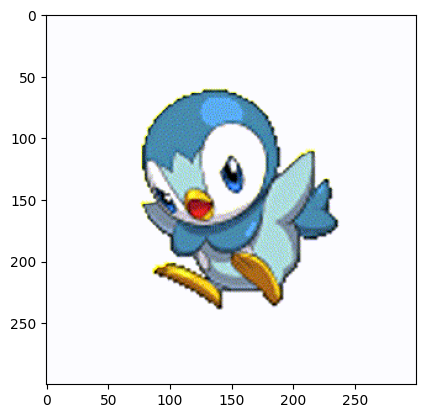

In [ ]:
# TESTING TASK 3
input_image = 'content/piplup.png' # original size: 128 x 128
print("Input image dimensions: ", get_image_dimensions(input_image),"\n")

output_image = 'task3.png' #will have size 300x300, quality = 5 (we reduce the quality)
new_width = 300 #size
new_height = 300
quality = 5 #quality

resize_and_reduce_quality(input_image, output_image, new_width, new_height, quality)
plt.imshow( Image.open(output_image))

print("\nOutput image dimensions: ", get_image_dimensions(output_image))


# TASK 4
Create a method called serpentine which should be able to read the bytes of a JPEG file in the serpentine way we saw.

In [ ]:
def print_image(file_path):

    image = Image.open(file_path).convert("L")  # "L" para grayscale
    pixels = np.array(image)

    # Print
    for row in pixels:
        for pixel in row:
            # Imprimir el valor de cada píxel (0-255 en grayscale)
            print(pixel, end=" ")
        print()

In [ ]:
# TASK 4
import numpy as np
from PIL import Image

def serpentine(file_path):

  image = Image.open(file_path).convert("L")  # "L" mode converts to grayscale
  pixels = np.array(image)

  height, width = pixels.shape

  #--------------------------------------------------------------------------------------------------------------------
  # Init output
  output = []
  i = 0
  j = 0

  output.append(pixels[i][j]) # Afegim el primer pixel
  i += 0
  j += 1
  output.append(pixels[i][j]) # Afegim el segon

  right = False
  left = True
  half = False

  # Primera meitat -------------------------------------------------------------------
  while(j <= width - 1 and half == False):
    # Per a les baixades
    while(j - 1>= 0 and i + 1 <= height - 1 and right == False):
      j -= 1
      i += 1
      output.append(pixels[i][j])
      if((j - 1) < 0 and (i + 1) <= height - 1): # Prevision para el siguiente paso
        j = 0
        i += 1
        output.append(pixels[i][j]) # Pas a baix
        right = True
        left = False

      elif((i + 1) > height - 1):  # Hemos llegado a una punta
        i = height - 1
        j += 1
        output.append(pixels[i][j]) # Pas a la dreta
        right = True
        left = False
        half = True

    # Per a les pujades
    while(j + 1 <= width - 1 and i - 1 >= 0 and left == False):
      j += 1
      i -= 1
      output.append(pixels[i][j])
      if(i - 1 < 0 and j + 1 <= width - 1):
        i = 0
        j += 1
        output.append(pixels[i][j]) # Pas a la dreta
        left = True
        right = False
      elif(j + 1 > width - 1):  # Hemos llegado a una punta
        j = width - 1
        i += 1
        output.append(pixels[i][j]) # Pas a baix
        left = True
        right = False
        half = True

  # Segona meitat -----------------------------------------------------------------
  right =  False
  left = True
  while(j <= width - 1 and half == True):
    # Per a les baixades
    while(j - 1>= 0 and i + 1 <= height - 1 and right == False):
      j -= 1
      i += 1
      output.append(pixels[i][j])
      if((i + 1) > height - 1): # Prevision para el siguiente paso
        j +=1
        i = height - 1
        output.append(pixels[i][j]) # Pas a la dreta
        right = True
        left = False
        if(i == height - 1 and j == width - 1):
          half = False

    # Per a les pujades
    while(j + 1 <= width - 1 and i - 1 >= 0 and left == False):
      j += 1
      i -= 1
      output.append(pixels[i][j])
      if(j + 1 > width - 1):
        i += 1
        j = width -1
        output.append(pixels[i][j]) # Pas a la dreta
        left = True
        right = False
        if(i == height - 1 and j == width - 1):
          half = False

  return output

In [ ]:
# TESTING TASK 4
image_path = "content/image_t4.jpg"
output = serpentine(image_path)
print(output[0:10])

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255]


In [ ]:
# TESTING TASK 4 - With AI

import numpy as np
from io import BytesIO
from PIL import Image

# Define a small 3x3 grayscale test image
test_array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=np.uint8)

# Expected output for serpentine traversal of this 3x3 array
expected_output = [1, 2, 4, 7, 5, 3, 6, 8, 9]

# Convert the array to an image and save it in an in-memory buffer
test_image = Image.fromarray(test_array)
image_buffer = BytesIO()
test_image.save(image_buffer, format='PNG')
image_buffer.seek(0)  # Restart buffer to beginning

# Run the serpentine function using the in-memory buffer
result = serpentine(image_buffer)

# Assert that the result matches the expected output
print(result)



[1, 2, 4, 7, 5, 3, 6, 8, 9]


# TASK 5


Use FFMPEG to transform the previous image into b/w. Do the hardest compression you can.

In [ ]:
# TASK 5
def compress2bw(input_image, output_image, width, height, quality):
  ffmpeg_command = f'ffmpeg -i {input_image} -vf "format=gray" -q:v {quality} {output_image}'
  !{ffmpeg_command}


In [ ]:
# TESTING TASK 5
input_image = 'content/piplup.png'
output_image = 'gray_piplup.png'

w, h = get_image_dimensions(input_image)

quality = 1  #compression factor
compress2bw(input_image, output_image, w, h, quality)

#Comments: The resulting image will be in Black and White, with the highest compression (quality = 1)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

#TASK 6

Create a method which applies a run-lenght encoding from a series of bytes given

In [ ]:
# TASK 6
# We will create a function that if it finds a 0, it includes 0 + #zeros.
def run_length(data_stream):
  count = 0
  output = []
  for i in range(len(data_stream)):
    if(data_stream[i] == 0):
      count += 1
      if(i == len(data_stream) - 1):
        output.append(0)
        output.append(count)
    elif(data_stream[i] != 0 and data_stream[i - 1] == 0):
      output.append(0)
      output.append(count)
      output.append(data_stream[i])
      count = 0
    else:
      output.append(data_stream[i])

  return output



In [ ]:
# TESTING TASK 6
data_stream = [0,2,3,4,0,0,0,5,6,0,0,6,0,0,0,0,0,5,0,1, 0]
print(run_length(data_stream))

[0, 1, 2, 3, 4, 0, 3, 5, 6, 0, 2, 6, 0, 5, 5, 0, 1, 1, 0, 1]


# TASK 7

Create a class which can convert, can decode (or both) an input using the DCT.Not necessary a JPG encoder or decoder. A class only about DCT is OK too.

In [ ]:
# TASK 7

# For this task we tried to create the DCT function by ourselves. Without using the imports.
import cv2
from scipy.fft import ifft, idct, dct
import numpy as np

class dct_conversion:
  def alpha(pixel, N):
    if(pixel == 0):
      return np.sqrt(1/N)
    else:
      return np.sqrt(2/N)

# MANUAL ONE
  def dct_array(image_path):
    image = Image.open(image_path).convert("L")  # "L" mode converts to grayscale
    image = np.array(image)
    #image = cv2.imread(image_path, cv2.COLOR_BGR2GRAY)
    N, M = get_image_dimensions(image_path)
    print(N,M)
    dct_matrix = np.zeros((N, M))
    for u in range(N):
      for v in range(M):
        alpha_u = dct_conversion.alpha(u, N)
        alpha_v = dct_conversion.alpha(v, M)
        sum = 0.0
        for i in range(N):
          for j in range(M):
            gxy = image[i][j]
            sum += gxy*np.cos(np.pi/N*(i + 0.5)*u) * np.cos(np.pi/N*(j + 0.5)*v)
        dct_matrix[u][v] = alpha_u * alpha_v * sum

    return dct_matrix


#2D DCT, defined in: https://stackoverflow.com/questions/7110899/how-do-i-apply-a-dct-to-an-image-in-python

#IMPORTED ONES
  def dct2(a):
    #return dct(a)
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

  def idct2(a):
    #return idct(dct_matrix)
    return idct(idct(a.T, norm='ortho').T, norm='ortho')




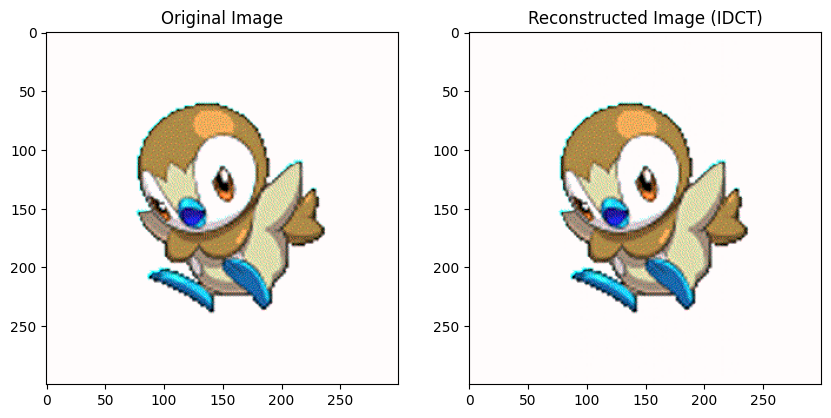

In [ ]:
# For this task, we will first test the imported functions (idct, dct)

#TESTING TASK 7 - IMPORTED ONES
input_image = cv2.imread("task3.png", cv2.COLOR_BGR2GRAY)
dct_matrix = dct_conversion.dct2(cv2.imread("task3.png", cv2.COLOR_BGR2GRAY))
idct_ = dct_conversion.idct2(dct_matrix)
idct_image = Image.fromarray(np.clip(idct_, 0, 255).astype(np.uint8))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(idct_image, cmap="gray")
plt.title("Reconstructed Image (IDCT)")

plt.show()

In [ ]:
# We will test our DCT function with an array, since with an image it takes a lot of time
# We can see that we obtain the same result with the imported ones, so it is working correctly
# TESTING TASK 7 - MANUAL ONE

# Define a small 3x3 grayscale test image
test_array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=np.uint8)


# Convert the array to an image and save it in an in-memory buffer
test_image = Image.fromarray(test_array)
image_buffer = BytesIO()
test_image.save(image_buffer, format='PNG')
image_buffer.seek(0)  # Restart buffer to beginning

result = dct_conversion.dct_array(image_buffer)

# Assert that the result matches the expected output
print(result)

print("//IMPORTED ONES//")
result2 = dct_conversion.dct2(test_array)
print(dct_conversion.dct2(test_array))

print(dct_conversion.idct2(result2))

3 3
[[ 1.50000000e+01 -2.44948974e+00 -5.44298719e-15]
 [-7.34846923e+00 -5.92118946e-16  1.77635684e-15]
 [-7.11775248e-15  1.18423789e-15  0.00000000e+00]]
//IMPORTED ONES//
[[ 1.50000000e+01 -2.44948974e+00 -1.33226763e-15]
 [-7.34846923e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


#TASK 8
Create a class which can convert, can decode (or both) an input using the DWT. Not necessary a JPEG2000 encoder or decoder. A class only about DWT is OK too


In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.9 MB/s eta 0:00:00


In [ ]:
# To do the DWT, we will import pywt

import cv2
import pywt

# TASK 8
class dwt_conversion:
  # Code
  def dwt(image_path):

      image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

      # Apply DWT
      coeficientes = pywt.dwt2(image, 'haar', mode = 'symmetric', axes =(-2,-1)) # Wavelet haar

      return coeficientes  #returns: cH - horizontal detail, cV - vertical detail, cD - diagonal detail, cA - approximation

  # Decode
  def idwt(cA, cH, cV, cD):
    image = pywt.idwt2((cA, (cH, cV, cD)), 'haar', mode = 'symmetric', axes =(-2,-1))
    return image

Original image: [[73 73 72 ... 71 72 72]
 [72 73 72 ... 71 70 70]
 [72 72 73 ... 70 66 64]
 ...
 [60 63 64 ... 40 40 40]
 [54 56 57 ... 38 38 38]
 [54 56 57 ... 38 38 38]]


 DWT conversion:
cA: [[145.5 143.  145.  ... 147.  143.  142. ]
 [143.  143.5 143.5 ... 148.  142.  128.5]
 [140.5 141.  143.5 ... 141.  132.5 117.5]
 ...
 [120.  135.5 125.5 ...  89.5  90.   90. ]
 [123.  128.  114.  ...  82.   79.5  80.5]
 [110.  114.  105.  ...  81.   76.   76. ]] 

 cH: [[ 0.5  0.   0.  ...  0.   0.   2. ]
 [ 1.   0.5  0.5 ...  0.   0.   1.5]
 [ 1.5  1.  -0.5 ...  2.   4.5  4.5]
 ...
 [ 0.   1.5  1.5 ...  3.5  2.   2. ]
 [ 0.   0.   3.  ...  0.   0.5  0.5]
 [ 0.   0.   0.  ...  0.   0.   0. ]] 

 cV: [[-0.5  1.  -3.  ...  1.   1.   0. ]
 [ 0.   1.5 -1.5 ...  1.   2.   2.5]
 [ 0.5  0.  -1.5 ...  1.   2.5  3.5]
 ...
 [-6.  -0.5  1.5 ... -0.5  1.   0. ]
 [-4.   1.   3.  ...  2.  -0.5 -0.5]
 [-2.   0.   3.  ...  1.   0.   0. ]] 

 cD: [[ 5.00000000e-01  0.00000000e+00  0.00000000e+00 ...  0.0000000

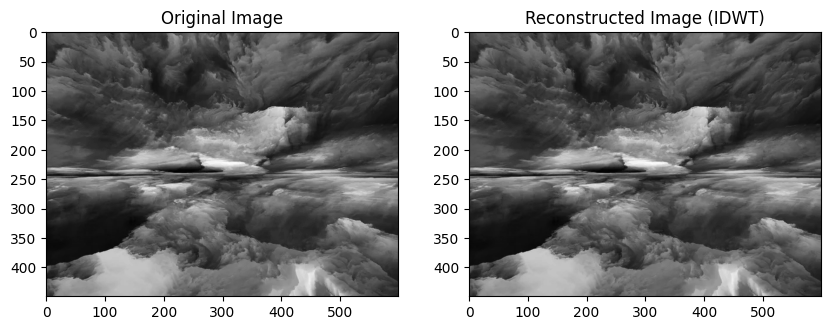

In [ ]:
# TESTING TASK 8
image_path = "content/color.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

print("Original image:", image)

print("\n\n DWT conversion:")
cA, (cH, cV, cD) = dwt_conversion.dwt(image_path)
print('cA:', cA, "\n\n cH:", cH, "\n\n cV:", cV, "\n\n cD:",cD)


decoded_image = dwt_conversion.idwt(cA, cH, cV, cD)
print('\n\n\nDecoded image:', decoded_image)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(decoded_image, cmap="gray")
plt.title("Reconstructed Image (IDWT)")

plt.show()
